In [1]:
import pandas as pd
import seaborn as sns
# from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import combinations
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv('/kaggle/input/nosu-ml/Dataset (1).csv')

In [3]:
df

,ym:s:date,ym:s:ipAddress,ym:s:visitDuration,ym:s:isNewUser,ym:s:daysSinceFirstVisit,ym:s:endURL,ym:s:previousVisitDate,ym:s:ageInterval,ym:s:regionArea,ym:s:userVisits,ym:s:pageviews,ym:s:avgVisitDurationSeconds,ym:s:pageDepth,ym:s:bounceRate
0,2020-06-25,109.172.58.xxx,10,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 45-54,Republic of Dagestan,1,2.0,10.0,2.0,0.0
1,2020-06-25,109.196.217.xxx,20,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 35‑44,Krasnoyarsk Krai,1,2.0,20.0,2.0,0.0
2,2020-06-25,109.205.148.xxx,22,New users,0,http://nosu.ru/,0000-00-00,Not specified,Republic of North Ossetia — Alania,1,2.0,22.0,2.0,0.0
3,2020-06-25,109.205.149.xxx,30,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 18‑24,Republic of North Ossetia — Alania,1,2.0,30.0,2.0,0.0
4,2020-06-25,109.205.149.xxx,283,Returning users,0,http://nosu.ru/abiturientam/postuplenie/dokume...,2020-06-25,Age 18‑24,Republic of North Ossetia — Alania,2,9.0,283.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411457,2024-03-01,95.161.223.xxx,15,New users,0,https://nosu.ru/,0000-00-00,Not specified,Saint-Petersburg and Leningrad Oblast,1,1.0,15.0,1.0,0.0
1411458,2024-03-01,95.167.247.xxx,14,Returning users,16,https://nosu.ru/abiturientam/postuplenie/bakal...,2024-02-14,Not specified,Chechen Republic,2,1.0,14.0,1.0,0.0
1411459,2024-03-01,95.214.211.xxx,259,New users,0,https://nosu.ru/facultet/it/kafedry/kafedra-pr...,0000-00-00,Not specified,Without an area,1,3.0,259.0,3.0,0.0
1411460,2024-03-01,95.25.38.xxx,15,Returning users,0,https://nosu.ru/struktura-universiteta/inye-st...,2024-02-29,Age 55+,Stavropol Krai,3,1.0,15.0,1.0,0.0


In [4]:
df.rename(columns=lambda x: x.strip().replace('ym:s:', ''), inplace=True)

In [5]:
df.columns

Index(['date', 'ipAddress', 'visitDuration', 'isNewUser',
       'daysSinceFirstVisit', 'endURL', 'previousVisitDate', 'ageInterval',
       'regionArea', 'userVisits', 'pageviews', 'avgVisitDurationSeconds',
       'pageDepth', 'bounceRate'],
      dtype='object')

In [6]:
missing_values = df.isnull().sum()

max_column_length = max(len(column) for column in df.columns)

for column, missing_count in missing_values.items():
    print(f'{column:<{max_column_length}} - {missing_count}')

date                    - 0
ipAddress               - 0
visitDuration           - 0
isNewUser               - 0
daysSinceFirstVisit     - 0
endURL                  - 0
previousVisitDate       - 0
ageInterval             - 0
regionArea              - 0
userVisits              - 0
pageviews               - 0
avgVisitDurationSeconds - 0
pageDepth               - 0
bounceRate              - 0


In [7]:
df

,date,ipAddress,visitDuration,isNewUser,daysSinceFirstVisit,endURL,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate
0,2020-06-25,109.172.58.xxx,10,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 45-54,Republic of Dagestan,1,2.0,10.0,2.0,0.0
1,2020-06-25,109.196.217.xxx,20,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 35‑44,Krasnoyarsk Krai,1,2.0,20.0,2.0,0.0
2,2020-06-25,109.205.148.xxx,22,New users,0,http://nosu.ru/,0000-00-00,Not specified,Republic of North Ossetia — Alania,1,2.0,22.0,2.0,0.0
3,2020-06-25,109.205.149.xxx,30,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 18‑24,Republic of North Ossetia — Alania,1,2.0,30.0,2.0,0.0
4,2020-06-25,109.205.149.xxx,283,Returning users,0,http://nosu.ru/abiturientam/postuplenie/dokume...,2020-06-25,Age 18‑24,Republic of North Ossetia — Alania,2,9.0,283.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411457,2024-03-01,95.161.223.xxx,15,New users,0,https://nosu.ru/,0000-00-00,Not specified,Saint-Petersburg and Leningrad Oblast,1,1.0,15.0,1.0,0.0
1411458,2024-03-01,95.167.247.xxx,14,Returning users,16,https://nosu.ru/abiturientam/postuplenie/bakal...,2024-02-14,Not specified,Chechen Republic,2,1.0,14.0,1.0,0.0
1411459,2024-03-01,95.214.211.xxx,259,New users,0,https://nosu.ru/facultet/it/kafedry/kafedra-pr...,0000-00-00,Not specified,Without an area,1,3.0,259.0,3.0,0.0
1411460,2024-03-01,95.25.38.xxx,15,Returning users,0,https://nosu.ru/struktura-universiteta/inye-st...,2024-02-29,Age 55+,Stavropol Krai,3,1.0,15.0,1.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411462 entries, 0 to 1411461
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   date                     1411462 non-null  object 
 1   ipAddress                1411462 non-null  object 
 2   visitDuration            1411462 non-null  int64  
 3   isNewUser                1411462 non-null  object 
 4   daysSinceFirstVisit      1411462 non-null  int64  
 5   endURL                   1411462 non-null  object 
 6   previousVisitDate        1411462 non-null  object 
 7   ageInterval              1411462 non-null  object 
 8   regionArea               1411462 non-null  object 
 9   userVisits               1411462 non-null  int64  
 10  pageviews                1411462 non-null  float64
 11  avgVisitDurationSeconds  1411462 non-null  float64
 12  pageDepth                1411462 non-null  float64
 13  bounceRate               1411462 non-null 

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
print(df.columns)

Index(['date', 'ipAddress', 'visitDuration', 'isNewUser',
       'daysSinceFirstVisit', 'endURL', 'previousVisitDate', 'ageInterval',
       'regionArea', 'userVisits', 'pageviews', 'avgVisitDurationSeconds',
       'pageDepth', 'bounceRate'],
      dtype='object')


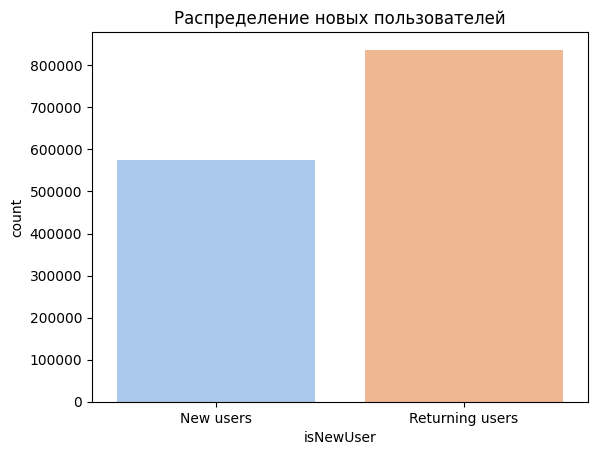

In [11]:
sns.countplot(x='isNewUser', data=df, palette='pastel')
plt.title('Распределение новых пользователей')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


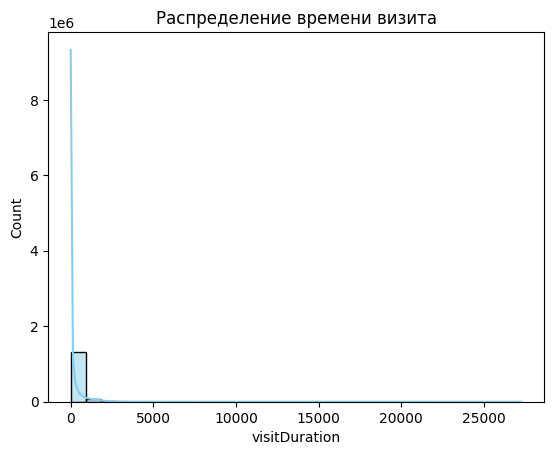

In [12]:
sns.histplot(df['visitDuration'], bins=30, kde=True, color='skyblue')
plt.title('Распределение времени визита')
plt.show()


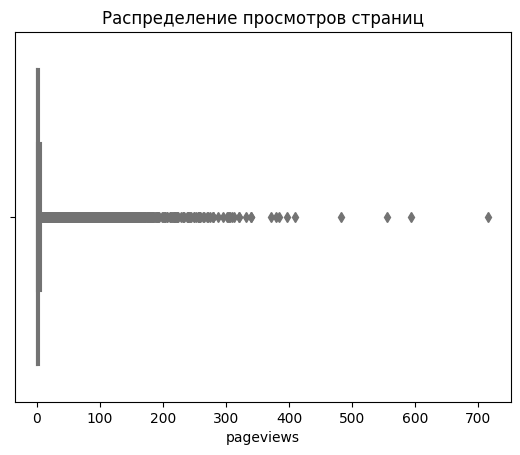

In [13]:
sns.boxplot(x='pageviews', data=df, color='lightgreen')
plt.title('Распределение просмотров страниц')
plt.show()

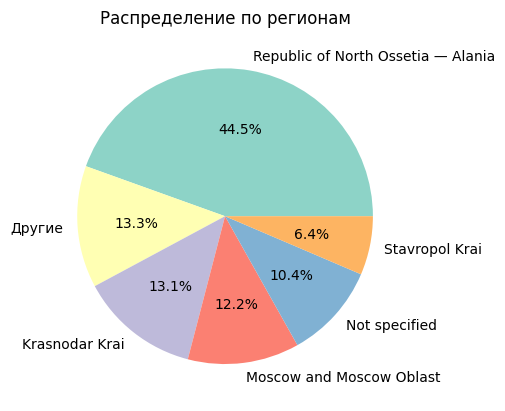

In [14]:
threshold = 0.05
region_counts = df['regionArea'].value_counts(normalize=True)

rare_regions = region_counts[region_counts < threshold].index

df['regionArea'] = df['regionArea'].replace(rare_regions, 'Другие')

df['regionArea'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Распределение по регионам')
plt.ylabel('')
plt.show()

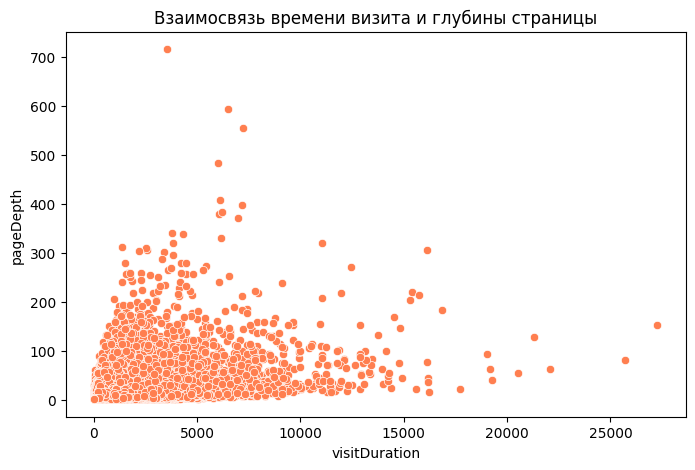

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='visitDuration', y='pageDepth', data=df, color='coral')
plt.title('Взаимосвязь времени визита и глубины страницы')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


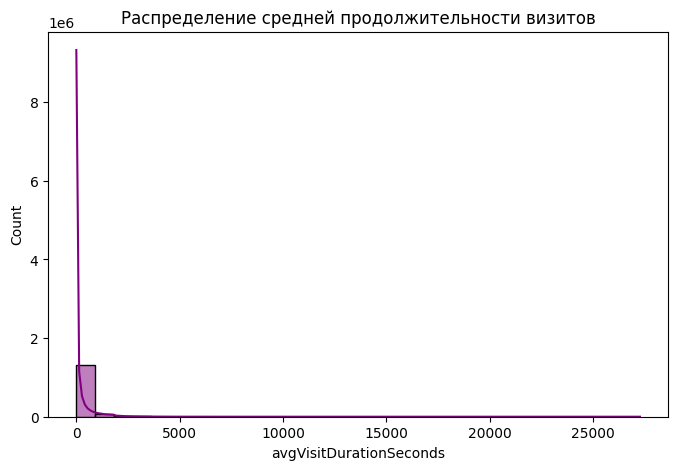

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['avgVisitDurationSeconds'], bins=30, kde=True, color='purple')
plt.title('Распределение средней продолжительности визитов')
plt.show()

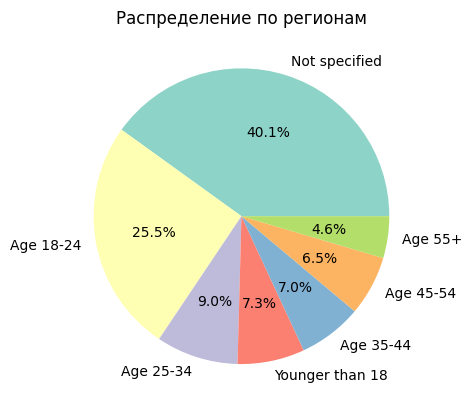

In [17]:
age_intraval = df['ageInterval'].value_counts(normalize=True)

df['ageInterval'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Распределение по регионам')
plt.ylabel('')
plt.show()

In [18]:
df.describe()

,date,visitDuration,daysSinceFirstVisit,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate
count,1411462,1.411462e+06,1.411462e+06,1.411462e+06,1.411462e+06,1.411462e+06,1.411462e+06,1.411462e+06
mean,2022-03-15 10:54:50.134059008,2.113294e+02,5.787677e+01,2.286237e+01,3.208036e+00,2.113294e+02,3.201605e+00,2.730967e+01
min,2020-06-25 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2021-04-28 00:00:00,6.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00
50%,2022-03-09 00:00:00,1.900000e+01,2.000000e+00,2.000000e+00,1.000000e+00,1.900000e+01,1.000000e+00,0.000000e+00
75%,2023-02-27 00:00:00,1.500000e+02,4.500000e+01,1.300000e+01,3.000000e+00,1.500000e+02,3.000000e+00,1.000000e+02
max,2024-03-01 00:00:00,2.727300e+04,1.344000e+03,1.703000e+03,7.160000e+02,2.727300e+04,7.160000e+02,1.000000e+02
std,NaN,5.189496e+02,1.393048e+02,7.291875e+01,5.882977e+00,5.189496e+02,5.884005e+00,4.455186e+01


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

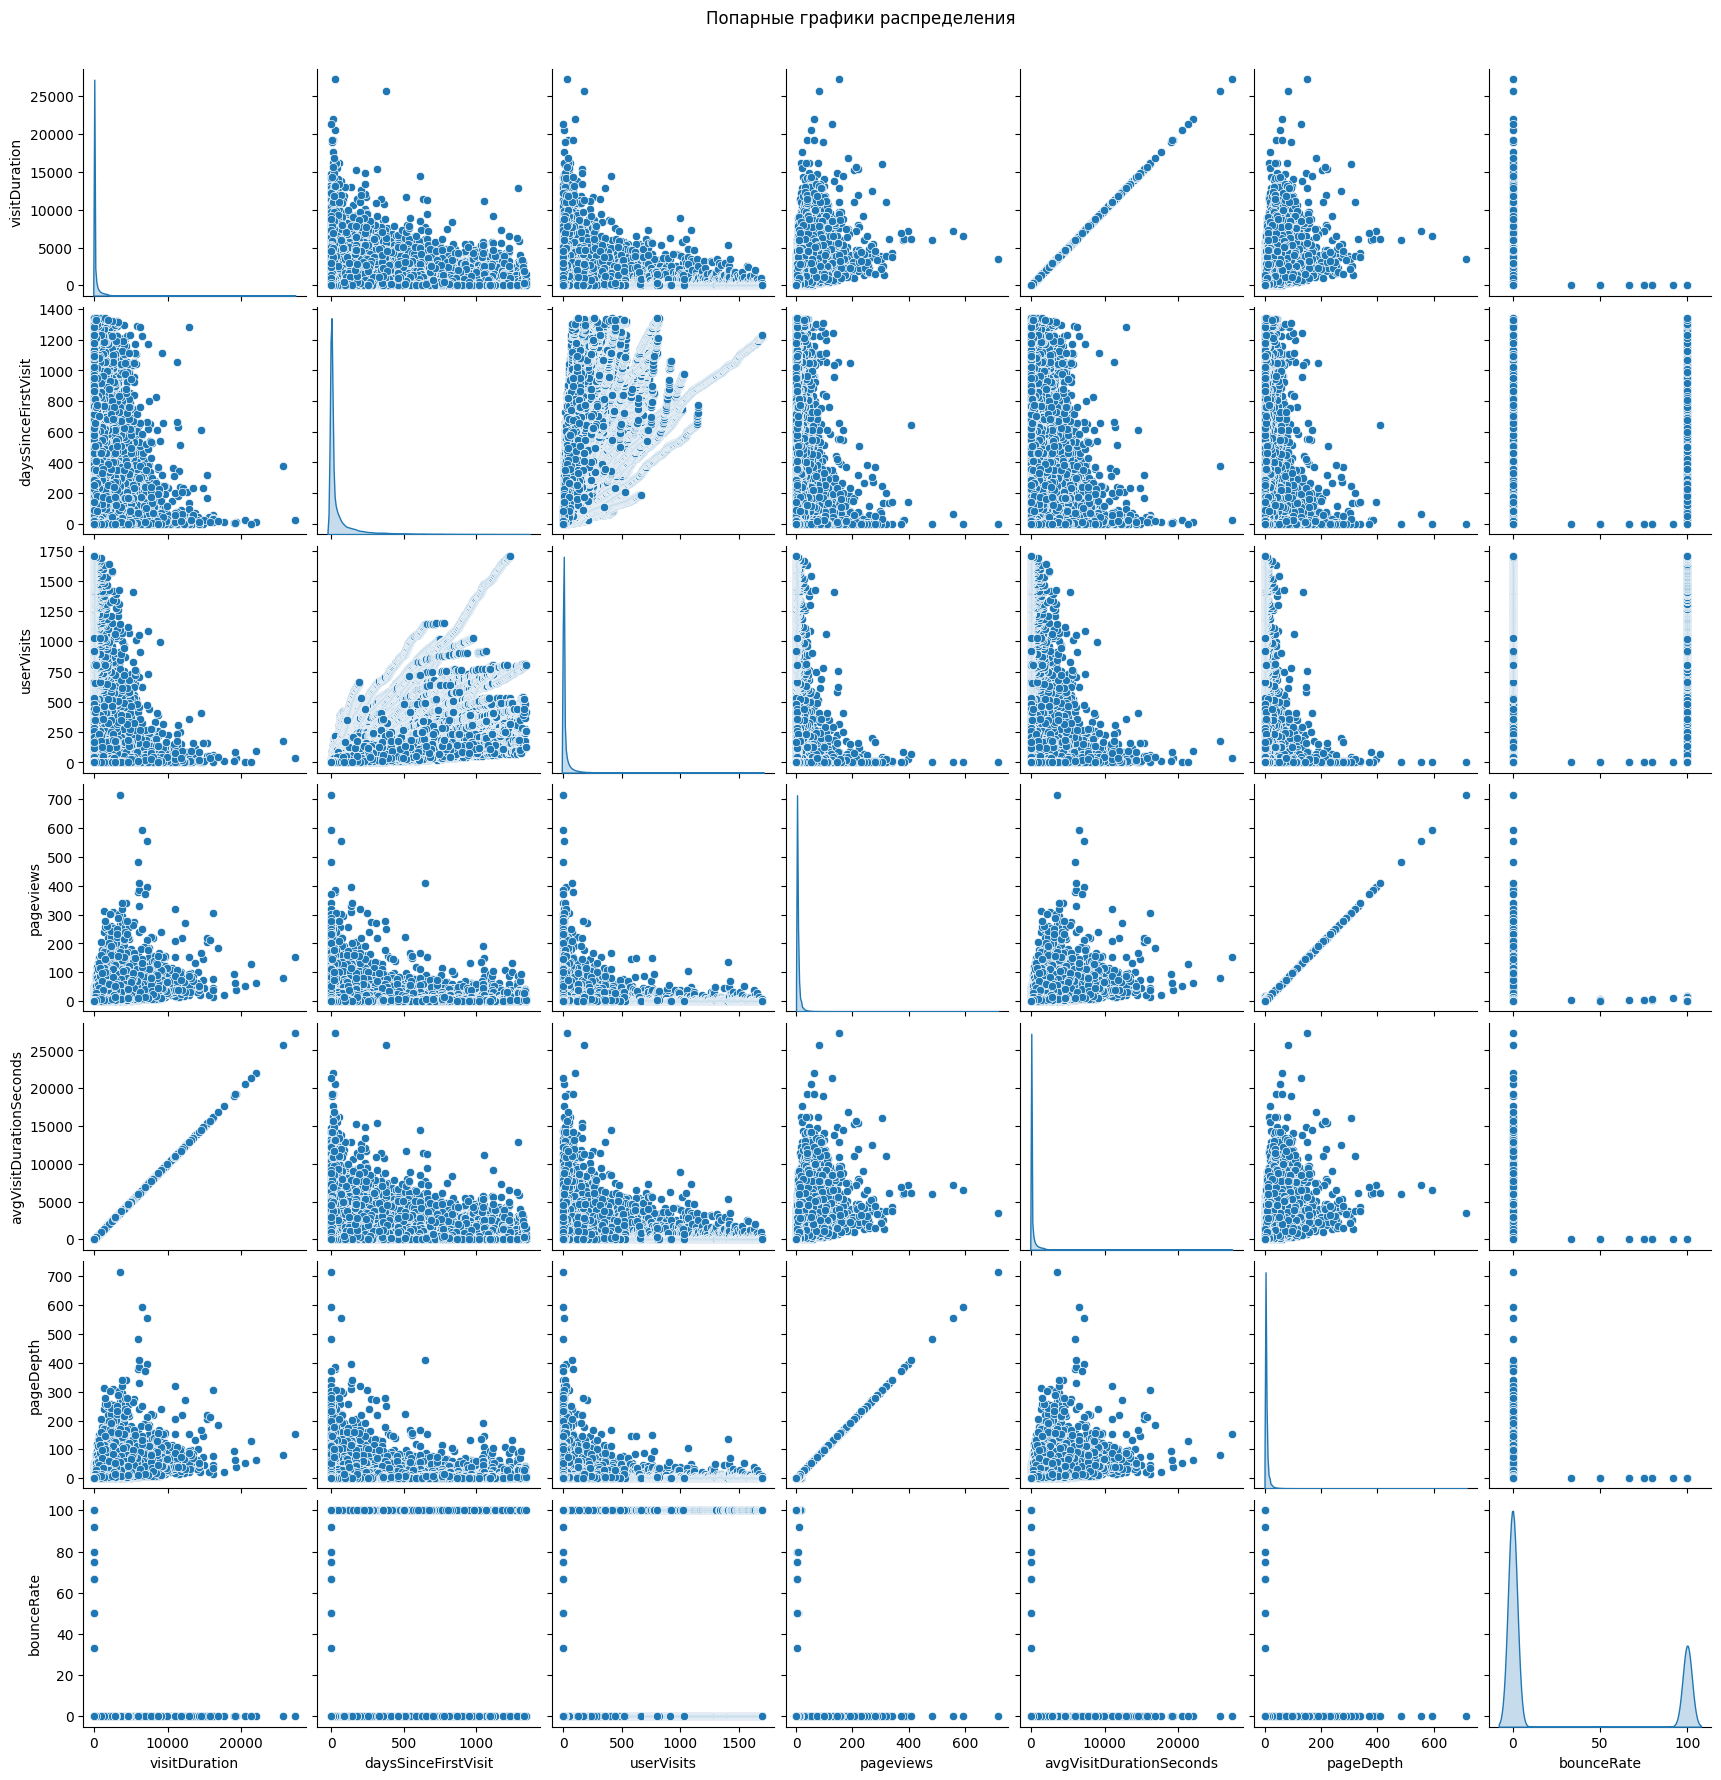

In [19]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='kde')
plt.suptitle('Попарные графики распределения', y=1.02)
plt.show()

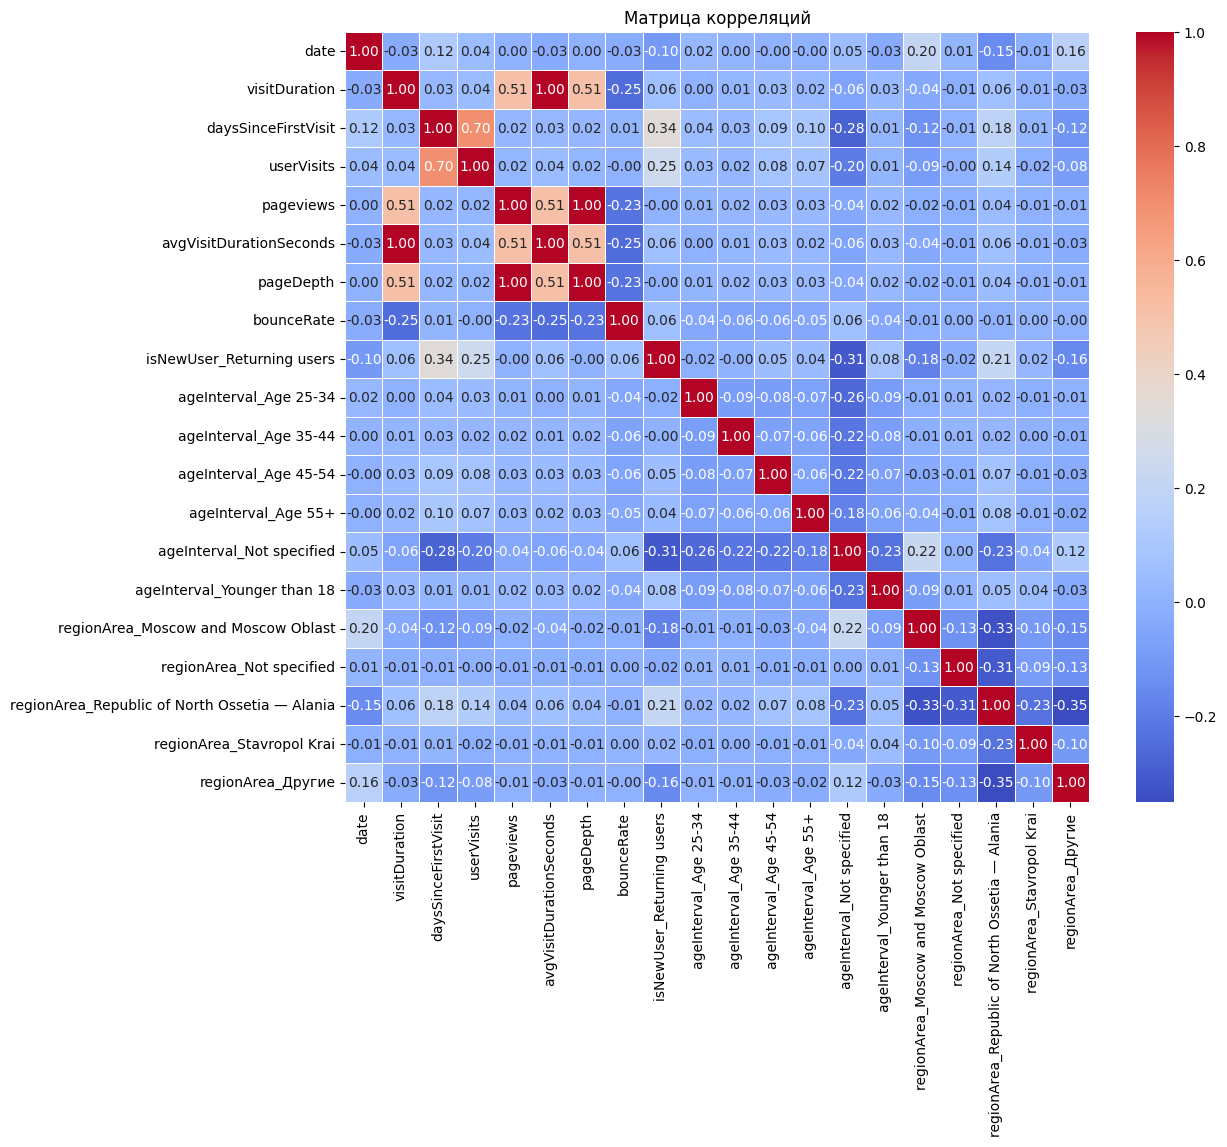

In [20]:
numerical_cols = ['visitDuration', 'daysSinceFirstVisit', 'userVisits', 'pageviews', 'avgVisitDurationSeconds', 'pageDepth', 'bounceRate']
df_corr = df

for col in numerical_cols:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

df_corr = df_corr.dropna(subset=numerical_cols)

df_corr = df_corr.drop(columns=['ipAddress', 'endURL', 'previousVisitDate'], errors='ignore')

categorical_cols = df_corr.select_dtypes(include=[object]).columns.tolist()
df_encoded = pd.get_dummies(df_corr, columns=categorical_cols, drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()


In [21]:
df

,date,ipAddress,visitDuration,isNewUser,daysSinceFirstVisit,endURL,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate
0,2020-06-25,109.172.58.xxx,10,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 45-54,Другие,1,2.0,10.0,2.0,0.0
1,2020-06-25,109.196.217.xxx,20,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 35‑44,Другие,1,2.0,20.0,2.0,0.0
2,2020-06-25,109.205.148.xxx,22,New users,0,http://nosu.ru/,0000-00-00,Not specified,Republic of North Ossetia — Alania,1,2.0,22.0,2.0,0.0
3,2020-06-25,109.205.149.xxx,30,New users,0,http://nosu.ru/abiturientam/postuplenie/,0000-00-00,Age 18‑24,Republic of North Ossetia — Alania,1,2.0,30.0,2.0,0.0
4,2020-06-25,109.205.149.xxx,283,Returning users,0,http://nosu.ru/abiturientam/postuplenie/dokume...,2020-06-25,Age 18‑24,Republic of North Ossetia — Alania,2,9.0,283.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411457,2024-03-01,95.161.223.xxx,15,New users,0,https://nosu.ru/,0000-00-00,Not specified,Другие,1,1.0,15.0,1.0,0.0
1411458,2024-03-01,95.167.247.xxx,14,Returning users,16,https://nosu.ru/abiturientam/postuplenie/bakal...,2024-02-14,Not specified,Другие,2,1.0,14.0,1.0,0.0
1411459,2024-03-01,95.214.211.xxx,259,New users,0,https://nosu.ru/facultet/it/kafedry/kafedra-pr...,0000-00-00,Not specified,Другие,1,3.0,259.0,3.0,0.0
1411460,2024-03-01,95.25.38.xxx,15,Returning users,0,https://nosu.ru/struktura-universiteta/inye-st...,2024-02-29,Age 55+,Stavropol Krai,3,1.0,15.0,1.0,0.0


In [22]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df[df['date'] >= '2021-01-01']

In [23]:
df

,date,ipAddress,visitDuration,isNewUser,daysSinceFirstVisit,endURL,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate
266127,2021-01-01,109.172.130.xxx,0,New users,0,https://nosu.ru/facultet/jur/kafedry/kafedra-u...,0000-00-00,Age 55+,Другие,1,1.0,0.0,1.0,100.0
266128,2021-01-01,109.205.147.xxx,45,Returning users,30,https://nosu.ru/sotrudnikam/lichnyj-kabinet/,2020-12-30,Age 18‑24,Republic of North Ossetia — Alania,3,1.0,45.0,1.0,0.0
266129,2021-01-01,109.205.149.xxx,134,Returning users,180,https://nosu.ru/studentam/socialnoe-obespechenie/,2021-01-01,Age 18‑24,Republic of North Ossetia — Alania,48,1.0,134.0,1.0,0.0
266130,2021-01-01,109.205.151.xxx,41,Returning users,6,https://nosu.ru/facultet/dzucev-hasan-vladimir...,2020-12-29,Not specified,Republic of North Ossetia — Alania,3,1.0,41.0,1.0,0.0
266131,2021-01-01,109.205.151.xxx,85,Returning users,76,https://nosu.ru/2020/12/zasedanie-kadrovoj-kom...,2020-12-27,Age 18‑24,Republic of North Ossetia — Alania,99,4.0,85.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411457,2024-03-01,95.161.223.xxx,15,New users,0,https://nosu.ru/,0000-00-00,Not specified,Другие,1,1.0,15.0,1.0,0.0
1411458,2024-03-01,95.167.247.xxx,14,Returning users,16,https://nosu.ru/abiturientam/postuplenie/bakal...,2024-02-14,Not specified,Другие,2,1.0,14.0,1.0,0.0
1411459,2024-03-01,95.214.211.xxx,259,New users,0,https://nosu.ru/facultet/it/kafedry/kafedra-pr...,0000-00-00,Not specified,Другие,1,3.0,259.0,3.0,0.0
1411460,2024-03-01,95.25.38.xxx,15,Returning users,0,https://nosu.ru/struktura-universiteta/inye-st...,2024-02-29,Age 55+,Stavropol Krai,3,1.0,15.0,1.0,0.0


In [24]:
df = df.drop(columns=['ipAddress'], errors='ignore')

In [25]:
def extract_info(url):
    faculty_match = re.search(r'/facultet/(\w+)/', url)
    faculty = faculty_match.group(1) if faculty_match else None

    if 'postuplenie' in url and faculty:
        return f"postuplenie , {faculty}"
    elif 'sotrudnikam' in url:
        return "sotrudnikam"
    elif 'postuplenie' in url:
        return "postuplenie"
    elif 'studentam' in url:
        return "studentam"
    elif 'magistratura' in url:
        return "magistratura"
    elif 'nauka' in url:
        return "nauka"
    elif 'aspirant' in url:
        return "aspirant"
    elif faculty:
        return f"{faculty}"
    else:
        return "Unknown"

df['faculty_info'] = df['endURL'].apply(extract_info)

In [26]:
df.head(50)

,date,visitDuration,isNewUser,daysSinceFirstVisit,endURL,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info
266127,2021-01-01,0,New users,0,https://nosu.ru/facultet/jur/kafedry/kafedra-u...,0000-00-00,Age 55+,Другие,1,1.0,0.0,1.0,100.0,jur
266128,2021-01-01,45,Returning users,30,https://nosu.ru/sotrudnikam/lichnyj-kabinet/,2020-12-30,Age 18‑24,Republic of North Ossetia — Alania,3,1.0,45.0,1.0,0.0,sotrudnikam
266129,2021-01-01,134,Returning users,180,https://nosu.ru/studentam/socialnoe-obespechenie/,2021-01-01,Age 18‑24,Republic of North Ossetia — Alania,48,1.0,134.0,1.0,0.0,studentam
266130,2021-01-01,41,Returning users,6,https://nosu.ru/facultet/dzucev-hasan-vladimir...,2020-12-29,Not specified,Republic of North Ossetia — Alania,3,1.0,41.0,1.0,0.0,Unknown
266131,2021-01-01,85,Returning users,76,https://nosu.ru/2020/12/zasedanie-kadrovoj-kom...,2020-12-27,Age 18‑24,Republic of North Ossetia — Alania,99,4.0,85.0,4.0,0.0,Unknown
266132,2021-01-01,0,New users,0,https://nosu.ru/kafedra-sportivnyh-igr-i-medik...,0000-00-00,Not specified,Другие,1,1.0,0.0,1.0,100.0,Unknown
266133,2021-01-01,12,New users,0,https://nosu.ru/abiturientam/postuplenie/magis...,0000-00-00,Age 55+,Другие,1,2.0,12.0,2.0,0.0,postuplenie
266134,2021-01-01,2384,New users,0,https://nosu.ru/images/NAUKA/Jekonomicheskie_n...,0000-00-00,Age 25‑34,Not specified,1,3.0,2384.0,3.0,0.0,Unknown
266135,2021-01-01,34,New users,0,https://nosu.ru/kafedra-teorii-i-istorii-socia...,0000-00-00,Age 25‑34,Другие,1,2.0,34.0,2.0,0.0,Unknown
266136,2021-01-01,13,New users,0,https://nosu.ru/,0000-00-00,Not specified,Moscow and Moscow Oblast,1,1.0,13.0,1.0,0.0,Unknown


In [27]:
faculty_info_distribution = df['faculty_info'].value_counts()
faculty_info_distribution

faculty_info
Unknown           531041
postuplenie       279260
sotrudnikam        95212
studentam          34219
jur                33529
econ               23585
nauka              20515
farma              17338
psych              16308
it                 13613
history            11453
chem                9694
inyaz               8726
mo                  7379
art                 7009
aspirant            7002
fizteh              6299
rusfil              4680
journ               4467
fizk                4289
osfil               3787
geo                 3547
magistratura        2367
kafedry                9
administracija         5
social                 2
Name: count, dtype: int64

In [28]:
unknown_rows = df[df['faculty_info'] == 'Unknown']

random_unknown_urls = unknown_rows['endURL'].sample(n=50, random_state=1)

random_unknown_urls


975668                                      https://nosu.ru/
330229                             https://nosu.ru/facultet/
790149                                      https://nosu.ru/
940966     https://nosu.ru/universitet/centry/centr-ustoj...
1030411                     https://nosu.ru/sveden/paid_edu/
733460              https://nosu.ru/universitet/rukovodstvo/
529495     https://nosu.ru/universitet/kontaktnaja-inform...
1120465    https://nosu.ru/konkurs-na-zameshhenie-dolzhno...
447188                                      https://nosu.ru/
1275780             https://nosu.ru/universitet/rukovodstvo/
1106265                                     https://nosu.ru/
999235     https://nosu.ru/2022/12/v-moskve-obsudili-novy...
946617     https://nosu.ru/universitet/centry/centr-akkre...
1050103                                     https://nosu.ru/
1040831    https://nosu.ru/kafedra-fizicheskogo-vospitani...
1301531                    https://nosu.ru/sveden/employees/
1005807                 

In [29]:
df = df.drop(columns=['endURL'], axis=1)

categorical_cols = ['isNewUser', 'ageInterval', 'regionArea', 'faculty_info']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [30]:
df

,date,visitDuration,isNewUser,daysSinceFirstVisit,previousVisitDate,ageInterval,regionArea,userVisits,pageviews,avgVisitDurationSeconds,pageDepth,bounceRate,faculty_info
266127,2021-01-01,0,0,0,0000-00-00,4,5,1,1.0,0.0,1.0,100.0,14
266128,2021-01-01,45,1,30,2020-12-30,0,3,3,1.0,45.0,1.0,0.0,24
266129,2021-01-01,134,1,180,2021-01-01,0,3,48,1.0,134.0,1.0,0.0,25
266130,2021-01-01,41,1,6,2020-12-29,5,3,3,1.0,41.0,1.0,0.0,0
266131,2021-01-01,85,1,76,2020-12-27,0,3,99,4.0,85.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411457,2024-03-01,15,0,0,0000-00-00,5,5,1,1.0,15.0,1.0,0.0,0
1411458,2024-03-01,14,1,16,2024-02-14,5,5,2,1.0,14.0,1.0,0.0,20
1411459,2024-03-01,259,0,0,0000-00-00,5,5,1,3.0,259.0,3.0,0.0,12
1411460,2024-03-01,15,1,0,2024-02-29,4,4,3,1.0,15.0,1.0,0.0,0


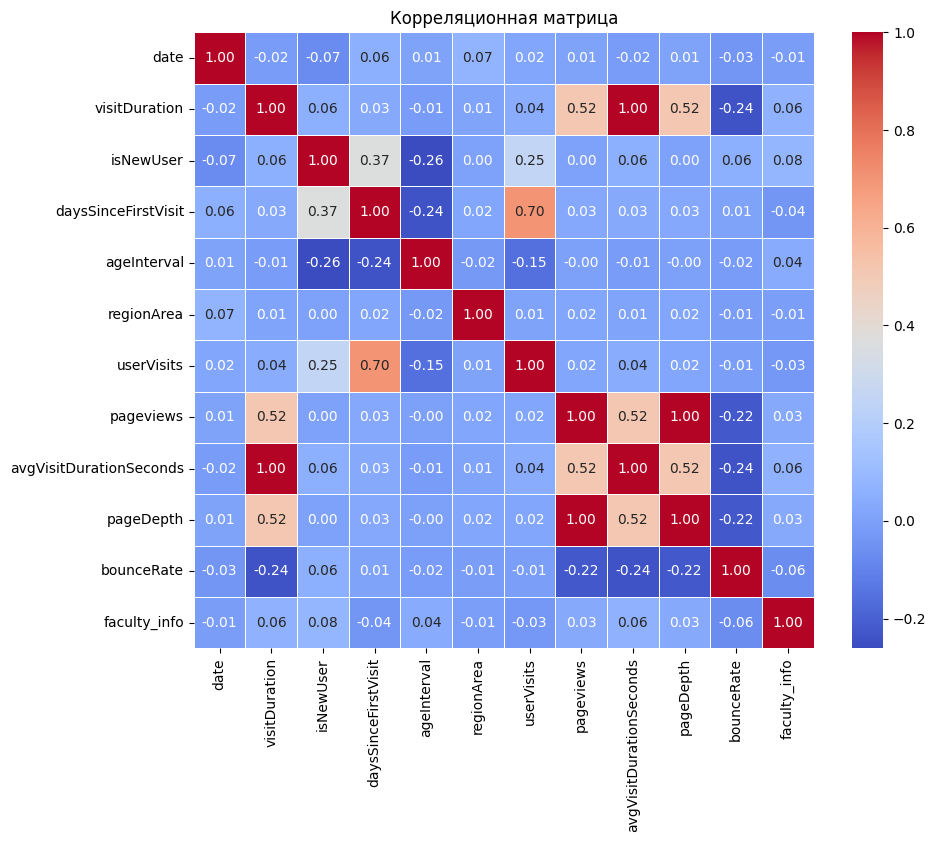

In [31]:
df = df.drop(columns=['previousVisitDate'])
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

#**Сильные Положительные Корреляции:**

**pageviews и pageDepth:** корреляция 0.999823. Это указывает на то, что количество просмотренных страниц и глубина просмотра сильно связаны. Это логично, поскольку глубина просмотра и количество страниц могут увеличиваться вместе.

**pageviews и avgVisitDurationSeconds:** корреляция 0.515503. Длительность визита и количество просмотренных страниц имеют умеренную положительную корреляцию.
# **Сильные Отрицательные Корреляции:**

**visitDuration и bounceRate:** корреляция -0.240733. Длительность визита и коэффициент отказов имеют умеренную отрицательную корреляцию, что может означать, что более длительные визиты связаны с меньшими коэффициентами отказов.

**userVisits и bounceRate:** корреляция -0.005841. Это очень низкое значение, что указывает на отсутствие значимой связи между количеством визитов пользователей и коэффициентом отказов.

# **Слабые Корреляции:**
Большинство корреляций между переменными ageInterval, regionArea, и faculty_info и другими числовыми признаками находятся близкими к нулю, что говорит о слабой или отсутствующей связи.

In [32]:
print("Корреляционная матрица:")
print(correlation_matrix)

Корреляционная матрица:
                             date  visitDuration  isNewUser  \
date                     1.000000      -0.016103  -0.068634   
visitDuration           -0.016103       1.000000   0.059136   
isNewUser               -0.068634       0.059136   1.000000   
daysSinceFirstVisit      0.058208       0.033737   0.368439   
ageInterval              0.007908      -0.014658  -0.260597   
regionArea               0.071977       0.012041   0.000593   
userVisits               0.015603       0.043748   0.254556   
pageviews                0.005665       0.515503   0.001804   
avgVisitDurationSeconds -0.016103       1.000000   0.059136   
pageDepth                0.005593       0.515805   0.002918   
bounceRate              -0.034762      -0.240733   0.057858   
faculty_info            -0.010206       0.061953   0.080864   

                         daysSinceFirstVisit  ageInterval  regionArea  \
date                                0.058208     0.007908    0.071977   
visitDurat

In [33]:
df = df.drop(columns=['avgVisitDurationSeconds'])
df = df.drop(columns=['pageviews'])

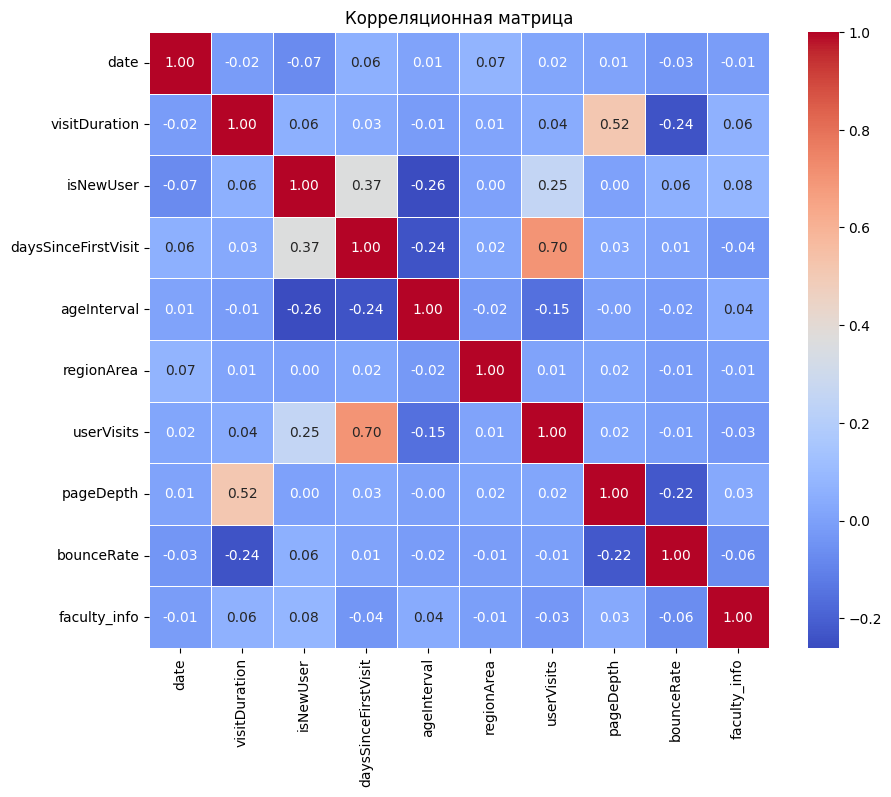

In [34]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [35]:
numerical_features = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

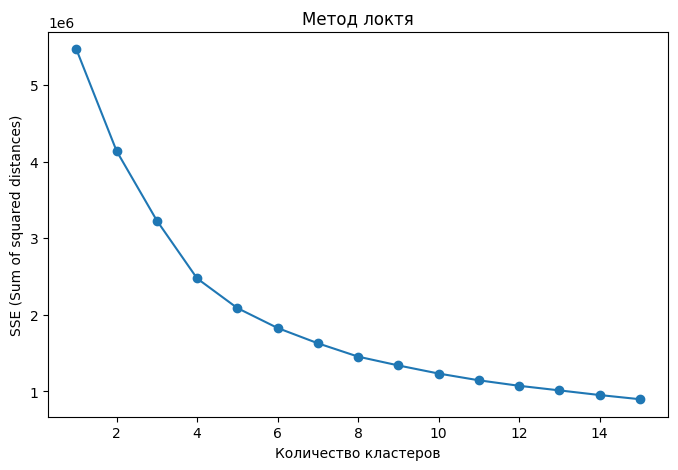

Оптимальное количество кластеров: 2


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


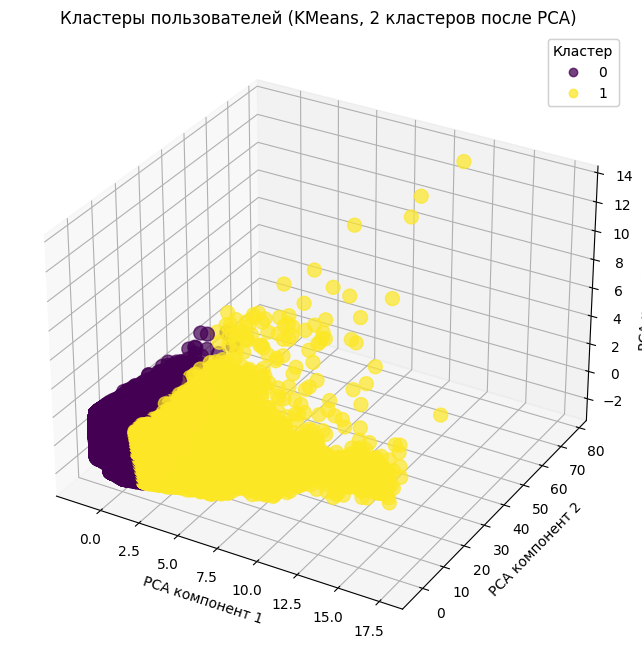

In [38]:

def find_optimal_clusters(data, max_k):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_) 

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Количество кластеров')
    plt.ylabel('SSE (Sum of squared distances)')
    plt.title('Метод локтя')
    plt.show()

    diffs = np.diff(sse)  
    optimal_k = np.argmin(diffs) + 2 
    print(f"Оптимальное количество кластеров: {optimal_k}")
    
    return optimal_k

pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

optimal_k = find_optimal_clusters(pca_features, max_k=15)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_features)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], 
                     c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

ax.set_title(f'Кластеры пользователей (KMeans, {optimal_k} кластеров после PCA)')
ax.set_xlabel('PCA компонент 1')
ax.set_ylabel('PCA компонент 2')
ax.set_zlabel('PCA компонент 3')

legend = ax.legend(*scatter.legend_elements(), title="Кластер")
ax.add_artist(legend)

plt.show()
